In [11]:
# %%html
# <style>
# summary {list-style: none; color:gray}
# summary::-webkit-details-marker {display: none; }
# details[open] summary::before { content:"↑"; color: gray; }
# details summary::before { content:"→"; color: gray; }
# </style>

In [12]:
%load_ext rpy2.ipython
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Some pasted figure

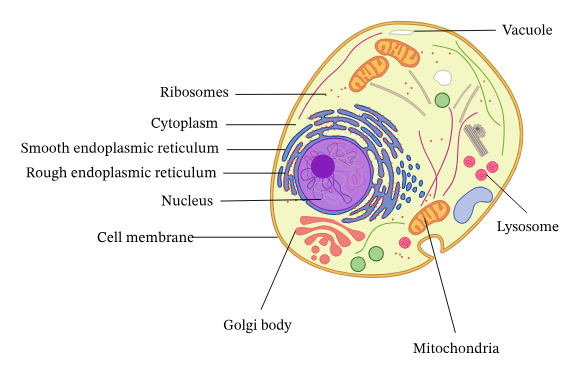

# Some simple Python code

Print numbers except 5:

In [13]:
for i in range(10):
    if i != 5:
        print(i)

0
1
2
3
4
6
7
8
9


<details><summary>Explainer</summary>
The provided code is written in Python and uses a for loop and an if statement to print numbers.

Here's what it does:

```python
for i in range(10):
```
<br>

This line starts a loop that will iterate over a sequence of numbers from 0 to 9. The `range(10)` function generates this sequence. The variable `i` is used to store the current number in each iteration of the loop.

```python
if i != 5:
```
<br>

This line is inside the loop and checks if the current number `i` is not equal to 5. The `!=` operator is used to check for inequality in Python.

```python
print(i)
```
<br>

This line is also inside the loop and the if statement. If the current number `i` is not equal to 5, it is printed to the console. If `i` is equal to 5, this line is skipped and the loop continues with the next number.

So, this code will print all numbers from 0 to 9, except for 5.

</details>

# Some simple R code

In [14]:
%%R
x <- seq(1, 10)
x

 [1]  1  2  3  4  5  6  7  8  9 10


<details><summary>Explainer</summary>
Here's what it does:

1. `x <- seq(1, 10)`: This line is creating a sequence of numbers from 1 to 10 and assigning it to the variable `x`. The `seq` function in R generates a sequence of numbers in the given range. The `<-` operator is the assignment operator in R, used to assign values to variables.

The `%%R` at the top of the cell is a cell magic command in Jupyter notebooks. It allows you to run R code in a Python Jupyter notebook. This is useful if you want to use both Python and R in the same notebook.

</details>

# Run some program locally and print its output

In [15]:
! ls

1hmp.pdb              foxp2.fa              showcase.ipynb
Untitled.ipynb        orchid.fasta
blast_output.xml      pandas_cookbook.ipynb


<details><summary>Explainer</summary>

The `!` symbol is a special Jupyter notebook command that allows you to run shell commands in the notebook cells. 

The `ls` command is a Unix command that lists the contents of a directory. So, `! ls` in a Jupyter notebook cell will display the contents of the current directory where the Jupyter notebook is running.

</details>

# Blast

In [16]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO

Parse the fasta file with the query sequence:

In [17]:
fasta_parser = SeqIO.parse("orchid.fasta", "fasta")
query = next(fasta_parser)

<details><summary>Explainer</summary>
The provided code is written in Python and uses the `Bio.SeqIO` module from the Biopython library, which is a set of tools for biological computation.

Here's what the code does:

```python
fasta_parser = SeqIO.parse("orchid.fasta", "fasta")
```
<br>

This line creates a parser object for a FASTA file named "orchid.fasta". `SeqIO.parse` is a function that turns a sequence file into an iterator yielding `SeqRecord` objects. The first argument is the file name and the second argument is the file format, in this case, "fasta".

```python
query = next(fasta_parser)
```
<br>

This line gets the next record from the parser. In this case, it will be the first record since `next` has not been called before. The `next` function retrieves the next item from an iterator. The `query` variable now holds a `SeqRecord` object which includes information about the sequence such as ID, name, description, and the sequence itself.

Note: The file "orchid.fasta" should be in the same directory as your Python script or Jupyter notebook for this code to run successfully. If it's in a different directory, you'll need to provide the full path to the file.

</details>

Blast using the query sequence:

In [18]:
blast_handle = NCBIWWW.qblast("blastn", "nt", query.seq)
blast_output = blast_handle.read()

<details><summary>Explainer</summary>
The provided code is written in Python and uses the `Bio.Blast.NCBIWWW` module from the Biopython library, which is a set of tools for biological computation.

Here's what the code does:

```python
blast_handle = NCBIWWW.qblast("blastn", "nt", query.seq)
```
<br>

This line performs a BLAST search using the NCBI's online BLAST web server. The `qblast` method sends a query to the server to perform a BLAST search and returns a handle to the results. The first argument is the type of BLAST search to perform ("blastn" for nucleotide-nucleotide BLAST), the second argument is the database to search against ("nt" for nucleotide database), and the third argument is the query sequence.

```python
blast_output = blast_handle.read()
```
<br>

This line reads the BLAST output. The `read` method is called on the handle returned by `qblast` to get the BLAST result. The result is a string in XML format which can be parsed to extract the information.

Note: The `query.seq` in the `qblast` method is the sequence part of a `SeqRecord` object obtained from parsing a sequence file. The sequence is used as the query for the BLAST search.

</details>

Write results to a file:

In [19]:
with open("blast_output.xml", "w") as output_file:
    output_file.write(blast_output)

<details><summary>Explainer</summary>
Here's what it does:

1. `with open("blast_output.xml", "w") as output_file:`: This line opens a file named "blast_output.xml" in write mode ("w") and assigns the file object to the variable `output_file`. The `with` keyword is used here to create a context, ensuring that the file is properly closed after it is no longer needed.

2. `output_file.write(blast_output)`: This line is indented under the `with` statement, meaning it's inside the context. This line writes the contents of the `blast_output` variable to the file. The `write` method of a file object is used to write a string to the file. In this case, `blast_output` is expected to be a string, which is typically the case when dealing with the output of a BLAST search.

After the `with` block is exited, the file "blast_output.xml" is automatically closed, even if an error occurs within the block. This is a good practice as it ensures that the file is always closed properly.

</details>

Print summaries of HSPs with E-value below 10e-9 and alignment length above 820:

In [20]:
result_file = open("blast_output.xml", 'r')
blast_records = NCBIXML.parse(result_file)

for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < 10e-9 and alignment.length > 820:
                print('Database sequence:', alignment.title[:70], '...')
                print('Alignment length:', alignment.length)
                print('E-value:', hsp.expect)
                print(hsp.query[0:50], '...')
                print(hsp.match[0:50], '...')
                print(hsp.sbjct[0:50], '...')
                print()

Database sequence: gi|1434743038|gb|MF543769.1| Cypripedium calceolus voucher CYCAOL02-21 ...
Alignment length: 850
E-value: 9.75865e-178
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACC ...
|||||||||||||||||||||||||||||||||||||||||| ||||||  ...
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACA ...

Database sequence: gi|1434743037|gb|MF543768.1| Cypripedium calceolus voucher CYCACM06-01 ...
Alignment length: 851
E-value: 1.18885e-176
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACC ...
|||||||||||||||||||||||||||||||||||||||||| ||||||  ...
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACA ...

Database sequence: gi|49425161|gb|AY557232.1| Cypripedium calceolus 18S ribosomal RNA gen ...
Alignment length: 983
E-value: 1.18885e-176
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACC ...
|||||||||||||||||||||||||||||||||||||||||| ||||||  ...
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACA ...

Database sequence: gi|1434743036|gb|MF543767.1| Cypripedium calceolus voucher CYCACM04-0

<details><summary>Explainer</summary>
The provided code is written in Python and uses the `Bio.Blast.NCBIXML` module from the Biopython library, which is a set of tools for biological computation.

Here's what it does:

```python
result_file = open("blast_output.xml", 'r')
```
<br>

This line opens a file named "blast_output.xml" in read mode ('r') and assigns the file object to the variable `result_file`. 

```python
blast_records = NCBIXML.parse(result_file)
```
<br>

This line parses the BLAST output file. The `parse` function in the `Bio.Blast.NCBIXML` module is used to parse the BLAST results in XML format. The function returns an iterator which yields `Blast.Record.Blast` objects for each result in the file. These objects can be used to access the details of the BLAST results.

The remaining code uses the `Bio.Blast` module from the Biopython library, which is a set of tools for biological computation.

Here's what it does:

```python
for blast_record in blast_records:
```
<br>

This line starts a loop over each BLAST record in `blast_records`. `blast_records` is expected to be an iterable of `Blast.Record.Blast` objects, typically obtained by parsing a BLAST output file.

```python
for alignment in blast_record.alignments:
```
<br>

This line starts a nested loop over each alignment in the current BLAST record. The `alignments` attribute of a `Blast.Record.Blast` object is a list of `Blast.Record.Alignment` objects, each representing a sequence that aligns with the query sequence.

```python
for hsp in alignment.hsps:
```
<br>

This line starts another nested loop over each high-scoring pair (HSP) in the current alignment. The `hsps` attribute of a `Blast.Record.Alignment` object is a list of `Blast.Record.HSP` objects, each representing a region in the aligned sequences that scores well.

```python
if hsp.expect < 0.0001:
```
<br>    

This line checks if the E-value of the current HSP is less than 0.0001. The E-value is a measure of the number of expected hits of similar quality (score) that could be found just by chance. The lower the E-value, the more significant the score is.

The last lines print information about the alignment and HSP if the E-value check passes. These lines print the title of the alignment (which typically includes the ID and description of the sequence), the length of the alignment, the E-value of the HSP, and the first 50 characters of the query sequence, match sequence, and subject sequence in the HSP. The `...` at the end indicates that the printed sequence is truncated.

</details>

# NCBI Nucleotide query

In [21]:
from Bio import Entrez, SeqIO

# your email address
Entrez.email = 'kaspermunch@birc.au.dk'

# your search query
entrez_query = 'FOXP2[Gene] AND Homo[Organism]'

# do the database search
handle = Entrez.esearch(db="nucleotide", term=entrez_query, retmax=3, idtype="acc")
results = Entrez.read(handle)
handle.close()

# download the sequences
handle = Entrez.efetch(db="nucleotide", id=results["IdList"], rettype='fasta', retmode="text")
records = SeqIO.parse(handle, "fasta")
output_file = open('foxp2.fa', 'w')
for rec in records:
	SeqIO.write(rec, output_file, format='fasta')

<details><summary>Explainer</summary>

The provided code is written in Python and uses the `Bio` module from the Biopython library, which is a set of tools for biological computation.

Here's what it does:

```python
from Bio import Entrez, SeqIO
```
<br>

These lines import the necessary modules. `Entrez` is a module for accessing the NCBI's Entrez databases, and `SeqIO` is a module for input and output of sequences.

```python
Entrez.email = 'kaspermunch@birc.au.dk'
```
<br>


This line sets the email address to be used for the Entrez queries. The NCBI requires users of its services to supply an email address.

```python
entrez_query = 'FOXP2[Gene] AND Homo[Organism]'
```
<br>


This line sets the query for the Entrez search. The query is looking for records where the gene is FOXP2 and the organism is Homo.

```python
handle = Entrez.esearch(db="nucleotide", term=entrez_query, retmax=3, idtype="acc")
results = Entrez.read(handle)
handle.close()
```  
<br>

These lines perform the Entrez search. The `esearch` function performs a search of the specified database ("nucleotide") using the specified query, and returns a maximum of 3 results (`retmax=3`). The `read` function reads the search results, and `handle.close()` closes the connection.

```python
handle = Entrez.efetch(db="nucleotide", id=results["IdList"], rettype='fasta', retmode="text")
records = SeqIO.parse(handle, "fasta")
```
<br>

These lines fetch the sequences corresponding to the IDs returned by the search. The `efetch` function retrieves records in the specified format ('fasta') from the specified database. The `SeqIO.parse` function parses the fetched sequences.

```python
output_file = open('foxp2.fa', 'w')
for rec in records:
    SeqIO.write(rec, output_file, format='fasta')
```
<br>

These lines write the fetched sequences to a file. The `open` function opens a file in write mode ('w'), and the `SeqIO.write` function writes each sequence to the file in FASTA format.

</details>

# Protein secondary structure

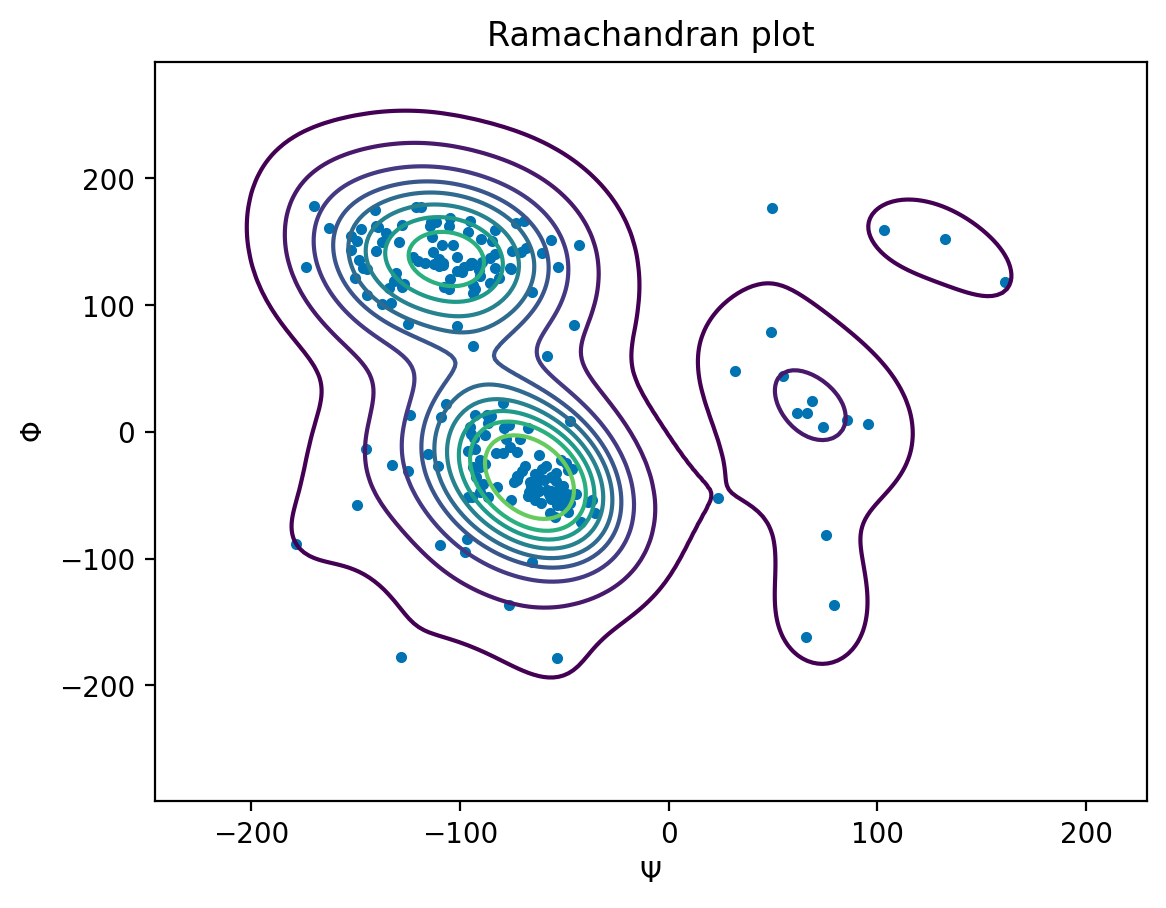

In [22]:
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import Bio.PDB
#warnings.filterwarnings('ignore', category=Bio.PDB.PDBExceptions.PDBConstructionWarning)
warnings.simplefilter("ignore")
sns.set_palette("colorblind")

def degrees(rad_angle) :
    """Converts any angle in radians to degrees.
    If the input is None, then it returns None.
    For numerical input, the output is mapped to [-180,180]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / math.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle


models = Bio.PDB.PDBParser().get_structure("1HMP", "1hmp.pdb")
chain = models[0]
polypeptides = Bio.PDB.PPBuilder().build_peptides(chain)
poly = polypeptides[0]

phi_list = []
psi_list = []
for phi, psi in poly.get_phi_psi_list():
    if phi is not None and psi is not None:
        phi_list.append(degrees(phi))
        psi_list.append(degrees(psi))

ax = sns.kdeplot(x=np.array(phi_list), y=np.array(psi_list),
                 cmap="viridis")
plt.scatter(np.array(phi_list), np.array(psi_list), marker=".")
plt.title("Ramachandran plot")
plt.xlabel(r'$\Psi$')
plt.ylabel(r'$\Phi$')
plt.show()

# Computations with broadcasting

In [23]:
import numpy as np

<details><summary>Explainer</summary>
This line is importing the numpy library into your Python script. Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

The `as np` part of the statement is simply aliasing `numpy` to `np`. This means that instead of having to type `numpy` each time you want to use a function from the numpy library, you can instead type `np`, which is quicker and more convenient. This is a common convention in the Python community.

</details>

In [24]:
x = np.random.random(10)
y = np.random.random(10)
z = x + y
z

array([1.20752371, 1.28286381, 0.68586594, 1.35727512, 1.06954835,
       0.47032426, 1.83442409, 0.54216218, 0.15769744, 0.86259109])

<details><summary>Explainer</summary>
This Python code is using the numpy library to perform some operations on arrays.

1. `x = np.random.random(10)`: This line is generating an array of 10 random numbers between 0 and 1 and assigning it to the variable `x`.

2. `y = np.random.random(10)`: Similarly, this line is generating another array of 10 random numbers between 0 and 1 and assigning it to the variable `y`.

3. `z = x + y`: This line is adding the two arrays `x` and `y` together. In numpy, this operation is performed element-wise, meaning that each corresponding pair of elements in `x` and `y` are added together to form a new array `z`. The result is an array of the same size (10 elements), where each element is the sum of the corresponding elements in `x` and `y`.

</details>

# Simple plotting with matplotlib

In [25]:
import matplotlib.pyplot as plt

<details><summary>Explainer</summary>
This line is importing the `pyplot` module from the `matplotlib` library and giving it an alias of `plt`.

`matplotlib` is a plotting library for Python and its numerical mathematics extension, NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

`pyplot` is a module in `matplotlib` that provides functions to add plot elements like text, lines, and images.

The `as plt` part of the statement is simply aliasing `matplotlib.pyplot` to `plt`. This means that instead of having to type `matplotlib.pyplot` each time you want to use a function from the `pyplot` module, you can instead type `plt`, which is quicker and more convenient. This is a common convention in the Python community.

</details>

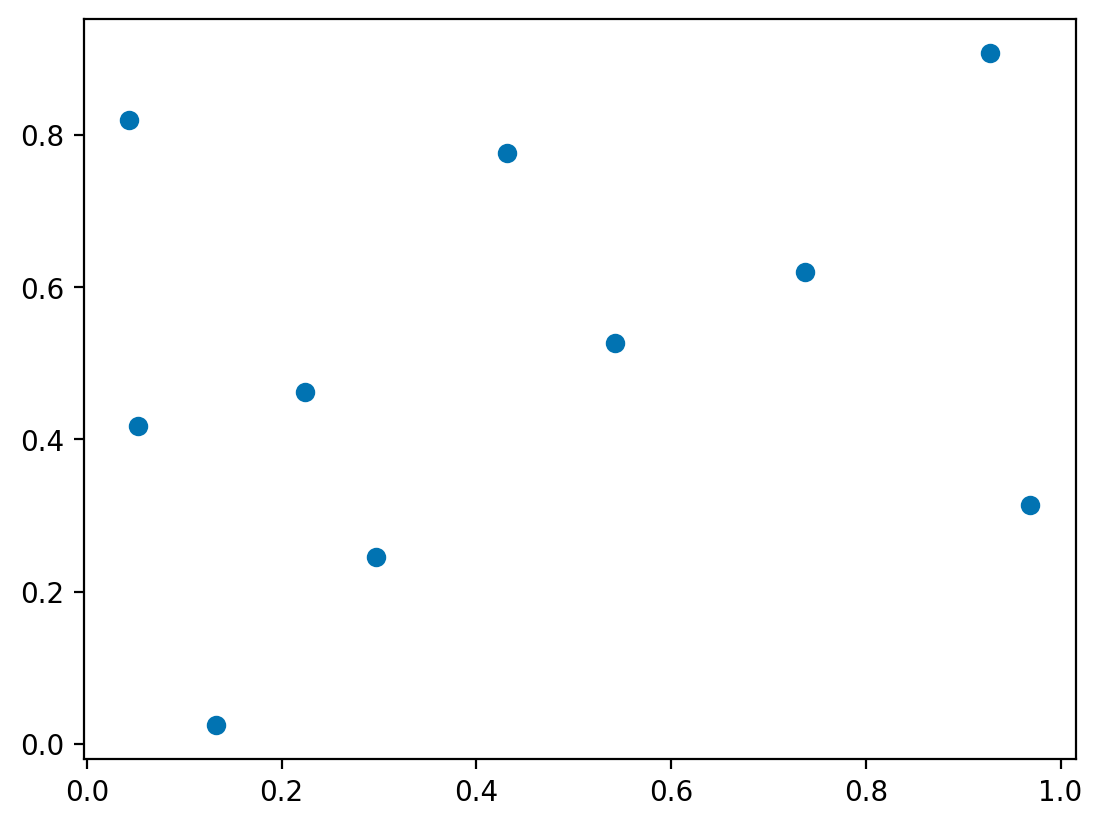

In [26]:
plt.scatter(x, y) ;

<details><summary>Explainer</summary>
This line is creating a scatter plot using `x` and `y` as the data points. The `scatter` function in `matplotlib.pyplot` (aliased as `plt`) creates a scatter plot, which is a type of plot using Cartesian coordinates to display values for two variables for a set of data.

Here, `x` and `y` are expected to be iterables (like lists or arrays) of the same length. Each pair of corresponding values in `x` and `y` will be plotted as a point in the scatter plot.

The semicolon at the end of the line is optional and is used to suppress the output of the command in a Jupyter notebook. If you don't want to display the memory address of the matplotlib object, you can end the line with a semicolon.

</details>

# Plotting with seaborn

In [27]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<details><summary>Explainer</summary>
The provided code is written in Python and uses the `seaborn` library, which is a statistical data visualization library based on `matplotlib`.

Here's what it does:

```python
import seaborn as sns
```
<br>

This line imports the `seaborn` library and gives it the alias `sns`. This is a common convention when using `seaborn`.

```python
df = sns.load_dataset("penguins")
```
<br>

This line loads the built-in "penguins" dataset from `seaborn` and assigns it to the variable `df`. `seaborn` provides some datasets that can be loaded for practice and this line is loading one of them. The "penguins" dataset contains data about penguins.

```python
df.head()
```
<br>

This line displays the first 5 rows of the dataframe `df`. The `head` method of a pandas DataFrame returns the first `n` rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default, it returns the first 5 rows.

</details>

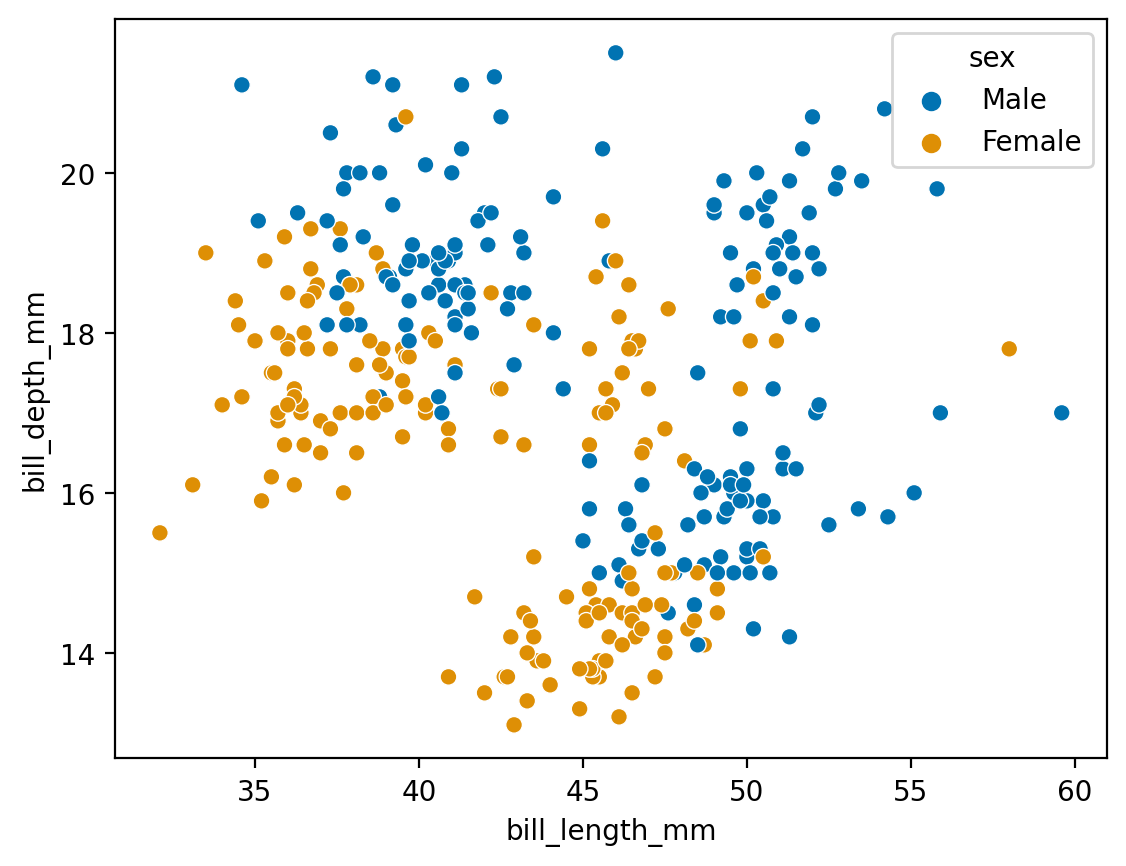

In [28]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex') ;

<details><summary>Explainer</summary>

The provided code is written in Python and uses the `seaborn` library, which is a statistical data visualization library based on `matplotlib`.

Here is what it does:

```python
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex');
```
<br>

This line creates a scatter plot using the `scatterplot` function from the `seaborn` library. The parameters passed to the function are:

- `data=df`: This specifies the dataset to use for the plot, which is expected to be a pandas DataFrame. In this case, it's using the DataFrame `df`.

- `x='bill_length_mm'` and `y='bill_depth_mm'`: These specify the variables in the DataFrame to map to the x and y axes of the plot, respectively.

- `hue='sex'`: This specifies the variable in the DataFrame to use to set the color of the points in the plot. In this case, it's using the 'sex' column, so points will be colored differently based on the sex of the penguin.

The semicolon at the end of the line is optional and is used to suppress output in Jupyter notebooks. It prevents the notebook from displaying the text representation of the plot object.

</details>

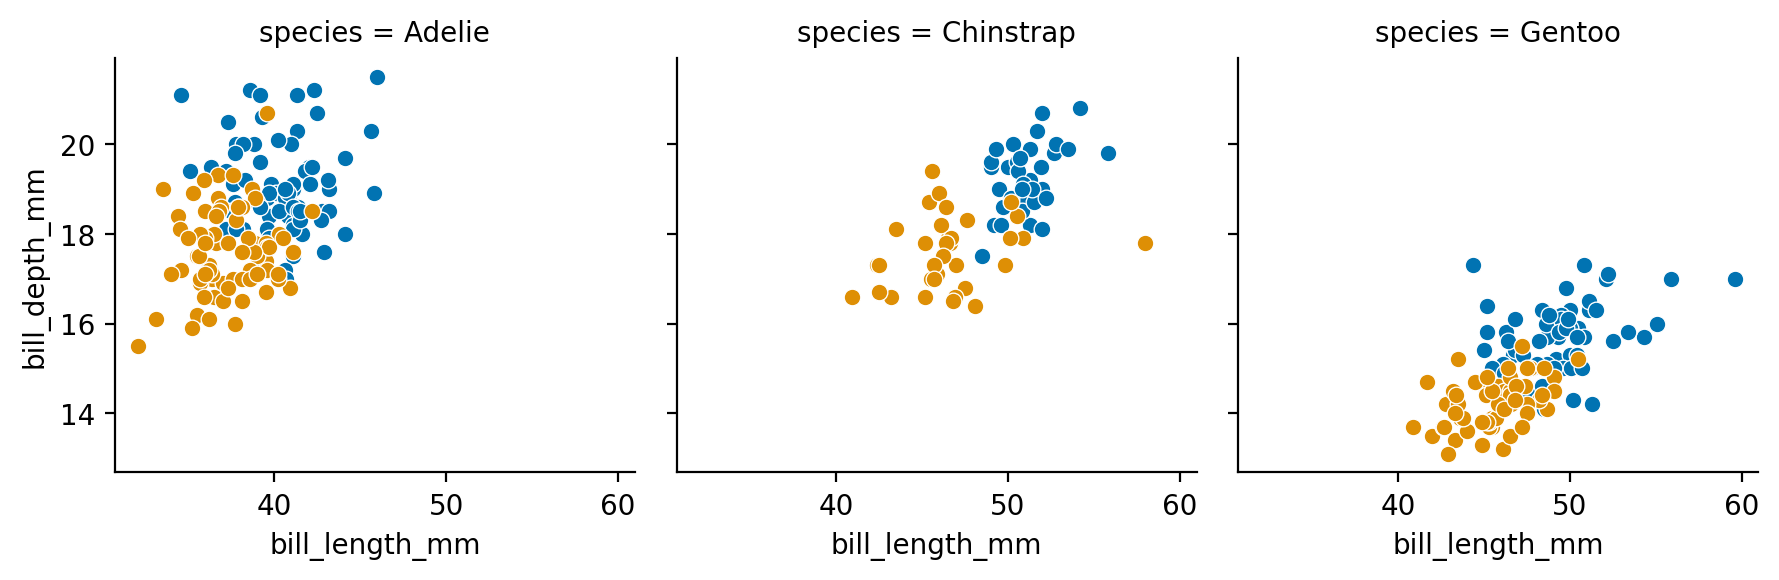

In [29]:
g = sns.FacetGrid(data=df, col='species', hue='sex')
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm') ;

<details><summary>Explainer</summary>
The provided code is written in Python and uses the `seaborn` library, which is a statistical data visualization library based on `matplotlib`.

Here's what it does:

```python
g = sns.FacetGrid(data=df, col='species', hue='sex')
```
<br>

This line creates a `FacetGrid` object. A `FacetGrid` is a multi-plot grid for plotting conditional relationships. The parameters passed to the function are:

- `data=df`: This specifies the dataset to use for the plot, which is expected to be a pandas DataFrame. In this case, it's using the DataFrame `df`.

- `col='species'`: This specifies the variable in the DataFrame to use to define the columns of the grid. In this case, it's using the 'species' column, so there will be one column of plots for each unique value in the 'species' column.

- `hue='sex'`: This specifies the variable in the DataFrame to use to set the color of the points in the plot. In this case, it's using the 'sex' column, so points will be colored differently based on the sex of the penguin.

```python
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm');
```
<br>

This line maps a scatter plot onto each facet of the grid. The `map` method of a `FacetGrid` object is used to apply a plotting function to each facet's subset of the data. In this case, it's using the `scatterplot` function from `seaborn`, and the x and y variables are 'bill_length_mm' and 'bill_depth_mm', respectively.

The semicolon at the end of the line is optional and is used to suppress output in Jupyter notebooks. It prevents the notebook from displaying the text representation of the plot object.

</details>

# Data frames (tables) with pandas

In [30]:
df.groupby(['species', 'island', 'sex']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    Female       37.359091      17.704545         187.181818   
                    Male         40.590909      19.036364         190.409091   
          Dream     Female       36.911111      17.618519         187.851852   
                    Male         40.071429      18.839286         191.928571   
          Torgersen Female       37.554167      17.550000         188.291667   
                    Male         40.586957      19.391304         194.913043   
Chinstrap Dream     Female       46.573529      17.588235         191.735294   
                    Male         51.094118      19.252941         199.911765   
Gentoo    Biscoe    Female       45.563793      14.237931         212.706897   
                    Male         49.473770      15.718033         221.540984   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    Female  3369.318182  
                    Male    4050.000000  
          Dream     Female  3344.444444  
                    Male    4045.535714  
          Torgersen Female  3395.833333  
                    Male    4034.782609  
Chinstrap Dream     Female  3527.205882  
                    Male    3938.970588  
Gentoo    Biscoe    Female  4679.741379  
                    Male    5484.836066

<details><summary>Explainer</summary>
The provided code is written in Python and uses the `groupby` function from the pandas library, which is a powerful and flexible method for grouping a DataFrame to calculate statistics.

Here's what it does:

```python
df.groupby(['species', 'island', 'sex']).mean()
```
<br>

This line groups the DataFrame `df` by the columns 'species', 'island', and 'sex'. For each unique combination of species, island, and sex, it calculates the mean of all other numerical columns in the DataFrame.

For example, if your DataFrame has a numerical column 'weight', this line of code will give you the average weight for each combination of species, island, and sex.

The `groupby` function returns a new DataFrame with the group labels as the index. The `mean` function is then called on this grouped DataFrame to calculate the mean of each group.

</details>

# Interactive plotting with pygwalker 

In [31]:
import pandas as pd
import pygwalker as pyg

In [32]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…